# NYPD Crime Reports Dataset

You are asked to analyze the dataset with all the valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of 2022.

The dataset is available at:
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

It is a big dataset with ~8 million crimes reported to NYPD.

## Attribute Description

Below you can find the description of the attributes, and their datatypes.

| Column | Description | Data Type
|--------|-------------------|----|
| CMPLNT_NUM | Randomly generated persistent ID for each complaint  | bigint(20) |
| CMPLNT_FR | Exact datetime of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists) | datetime |
| CMPLNT_TO | Ending datetime of occurrence for the reported event, if exact time of occurrence is unknown | datetime
| RPT_DT | Date event was reported to police  | date
| KY_CD | Three digit offense classification code | char(3)
| PD_CD | Three digit internal classification code (more granular than Key Code) | char(3)
| JURISDICTION_CODE	| | smallint(6)
| CRM_ATPT_CPTD_CD | Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely | enum('COMPLETED','ATTEMPTED')
| LAW_CAT_CD | Level of offense: felony, misdemeanor, violation  | enum('FELONY','MISDEMEANOR','VIOLATION')
| BORO_NM | The name of the borough in which the incident occurred | enum('BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND')
| ADDR_PCT_CD | The precinct in which the incident occurred | char(3)
| LOC_OF_OCCUR_DESC | Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of | enum('FRONT OF','INSIDE','OPPOSITE OF','OUTSIDE','REAR OF')
| PATROL_BORO | |	enum('PATROL BORO BRONX','PATROL BORO BKLYN SOUTH','PATROL BORO BKLYN NORTH','PATROL BORO MAN SOUTH','PATROL BORO MAN NORTH','PATROL BORO QUEENS NORTH','PATROL BORO QUEENS SOUTH','PATROL BORO STATEN ISLAND')
| PREM_TYP_DESC | Specific description of premises; grocery store, residence, street, etc. | varchar(80)
| SUSP_RACE  | |		enum('UNKNOWN','BLACK','WHITE','WHITE HISPANIC','ASIAN / PACIFIC ISLANDER','BLACK HISPANIC','AMERICAN INDIAN/ALASKAN NATIVE')
| VIC_RACE  | |		enum('UNKNOWN','BLACK','WHITE','WHITE HISPANIC','ASIAN / PACIFIC ISLANDER','BLACK HISPANIC','AMERICAN INDIAN/ALASKAN NATIVE')
| SUSP_AGE_GROUP  | |		enum('<18','18-24','25-44','45-64','65+')
| VIC_AGE_GROUP  | |		enum('<18','18-24','25-44','45-64','65+')
| SUSP_SEX  | |		enum('M','F')
| VIC_SEX  | |	enum('M','F','E','D')
| Latitude | Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)  | double
| Longitude | Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) | double


### Auxiliary Tables

We also have three auxiliary tables `jurisdiction_codes`, `offense_codes`, `penal_codes`, which provide descriptions for the `JURISDICTION_CODE`, `KY_CD`, and `PD_CD` attributes of the main table.




Additional Notes: https://www1.nyc.gov/assets/nypd/downloads/pdf/analysis_and_planning/incident_level_data_footnotes.pdf



## MySQL Database

For your convenience, the dataset is stored in the `nypd` database on the MySQL Server `db.ipeirotis.org`. You can connect and see the dataset using your standard username and password (`student`, `dwdstudent2015`).

In [2]:
!sudo pip3 install  -U -q geopandas PyMySQL sqlalchemy sql_magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 10.0 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from matplotlib.ticker import ScalarFormatter
from sqlalchemy import create_engine
from sqlalchemy import text
import geopandas as gpd
import seaborn as sns
import matplotlib as plt

In [ ]:
conn_string = 'mysql+pymysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='student',
    password='dwdstudent2015',
    host = 'db.ipeirotis.org',
    port=3306,
    db='nypd',
    encoding = 'utf8'
)
engine = create_engine(conn_string)

# Questions

You are asked to analyze the dataset and provide answers for the questions below. You can answer the questions using Python, SQL, or a combination of them.

## Question 1: Composition of crimes

* **Question 1a**: How many total reported crimes are in the dataset?
* **Question 1b**: Analyze the column `LAW_CAT_CD` and provide the breakdown of the reported crimes among `FELONY`,`MISDEMEANOR`, and `VIOLATION`, i.e., report the number of felonies, misdemeanors, and violations. Create a bar plot showing the values across the three crime types.
* **Question 1c**: Across **felonies**, report the number of crimes, broken down by  offense description (as reported in the `OFNS_DESC` column of the `offense_codes` table). Create a bar plot showing the frequency of the top-10 offense descriptions for the felonies.

In [ ]:
# Question 1a: How many total reported crimes are in the dataset?

sql = '''
	SELECT COUNT(*) FROM nypd;
'''
with engine.connect() as connection:
	df = pd.read_sql(text(sql), con=connection)

df

COUNT(*)
0   8338675

In [ ]:
# Question 1b: Analyze the column LAW_CAT_CD and report the number of felonies, misdemeanors, and violations.

sql = '''
	SELECT LAW_CAT_CD, COUNT(*) AS count
FROM nypd
GROUP BY LAW_CAT_CD;
'''

with engine.connect() as connection:
	df = pd.read_sql(text(sql), con=connection)

df

LAW_CAT_CD    count
0       FELONY  2596201
1  MISDEMEANOR  4625621
2    VIOLATION  1116853

<Axes: xlabel='LAW_CAT_CD'>

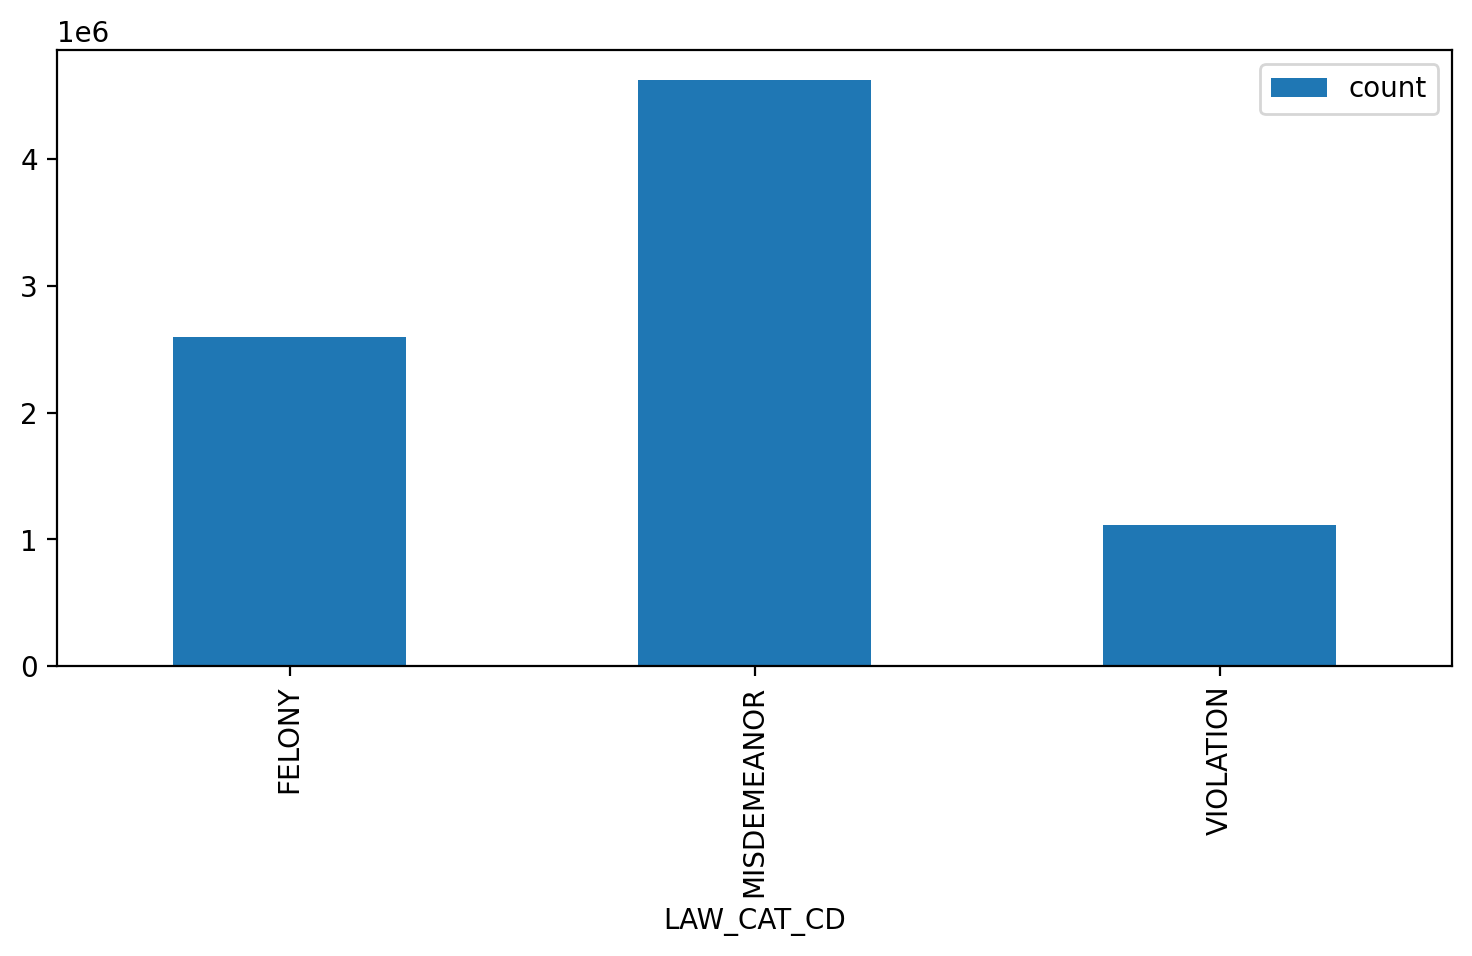

In [ ]:
# Create a bar plot showing the values across the three crime types.
df.plot(
    kind='bar',
    x = 'LAW_CAT_CD',
    figsize=(9,4)
)

In [ ]:
# Question 1c: Across felonies, report the number of crimes, broken down by offense description (as reported in the OFNS_DESC column)

sql = '''
SELECT nypd.KY_CD, offense_codes.OFNS_DESC, COUNT(*) AS count
FROM nypd
INNER JOIN offense_codes
ON nypd.KY_CD = offense_codes.KY_CD
GROUP BY nypd.KY_CD
ORDER BY count DESC;
'''

with engine.connect() as connection:
	df = pd.read_sql(text(sql), con=connection)

df


KY_CD                       OFNS_DESC    count
0     341                   PETIT LARCENY  1443342
1     578                   HARRASSMENT 2  1100610
2     344    ASSAULT 3 & RELATED OFFENSES   875736
3     109                   GRAND LARCENY   729804
4     351  CRIMINAL MISCHIEF & RELATED OF   681206
..    ...                             ...      ...
70    881        OTHER TRAFFIC INFRACTION       15
71    357                 FORTUNE TELLING       12
72    123                        ABORTION        7
73    362  OFFENSES AGAINST MARRIAGE UNCL        5
74    577    UNDER THE INFLUENCE OF DRUGS        3

[75 rows x 3 columns]

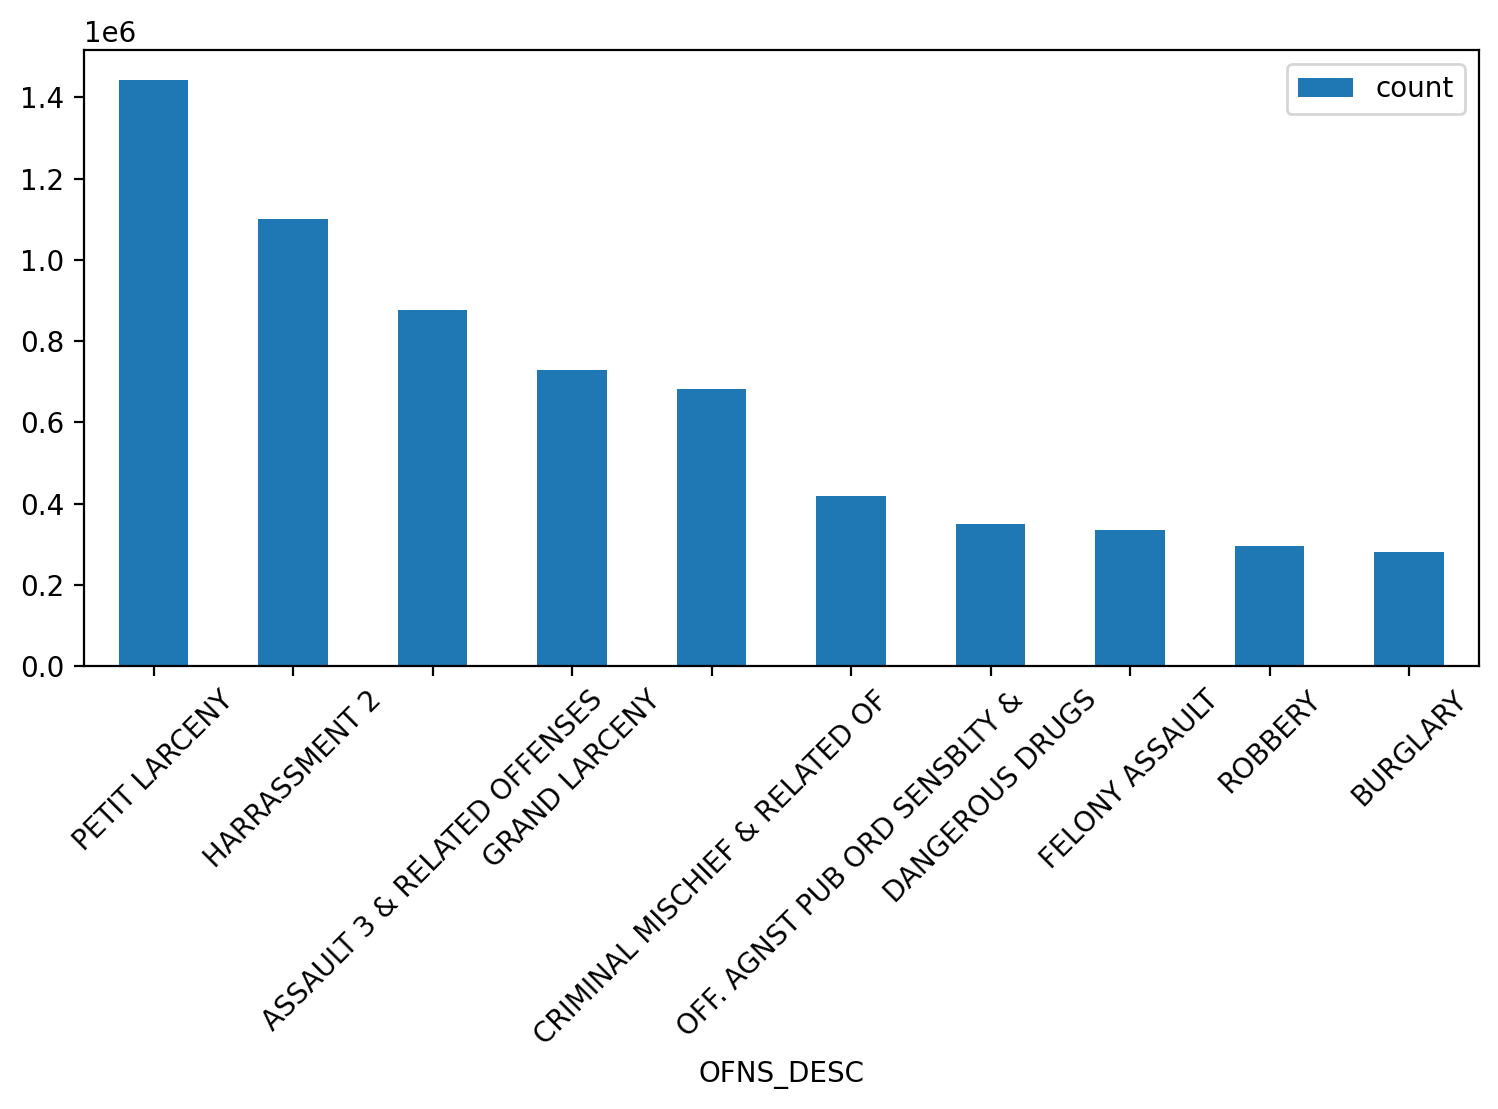

In [ ]:
# Create a bar plot showing the frequency of the top-10 offense descriptions
ax=df[['OFNS_DESC', 'count']].head(10).plot(
    kind='bar',
    x='OFNS_DESC',
    rot=45,
    figsize=(9, 4)
)
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))


## Question 2: Is crime increasing or decreasing in NYC?

Use the column `CMPLNT_FR` that reports the date/time of the crime. You are asked to analyze the crimes that happened between January 1st 2006 and December 31st 2022.

* **Question 2a**: Create a plot that shows the *total* number of **all** reported crimes *per year*.

* **Question 2b**: Create a plot that shows the *total* number of **all** reported crimes *per month*  (ie Jan-2006, Feb-2006, ... Jan-2007, Feb-2007, Dec-2022).



**Hint 1**: Be aware that comparisons with dates in MySQL are tricky. You will want to use the format `YYYY-MM-DD` for a date (e.g., "2006-01-01"), so that it gets properly interpreted by MySQL.

**Hint 2**: You can use the `YEAR(CMPLNT_FR)` to extract the year. You can use the `DATE_FORMAT(CMPLNT_FR, '%Y-%m-01')` command in SQL to truncate the field `CMPLNT_FR` and set it to the first day of the month.

**Hint 3**: Alternatively, you can use the  `resample` command in Pandas, to compute statistics on a per-month and per-year basis. If you use resample, remember that you need to make the date column to be the "index" of the dataframe using the `.set_index(CMPLNT_FR)` command (assuming `CMPLNT_FR` is the name of the column with the date) to create a new dataframe with the date being the infex. Be cautious if you get back from SQL the raw datetimes, and  understand the difference between `resample(...).sum()` and `resample(...).mean()`. The `mean()` vs `sum()` can generate very different results, especially when the timestamp variable has a very fine granularity (as happens in our case with `CMPLNT_FR`).

In [ ]:
# Question 2a: Create a plot that shows the total number of all reported crimes per year.
sql = '''

  SELECT YEAR(CMPLNT_FR) AS YEAR, COUNT(*) AS COUNT
  FROM nypd
  WHERE YEAR(CMPLNT_FR) BETWEEN 2006 AND 2022
  GROUP BY YEAR
  ORDER BY YEAR
'''

with engine.connect() as connection:
	date_df = pd.read_sql(text(sql), con=connection)

date_df

YEAR   COUNT
0   2006  528805
1   2007  535152
2   2008  528603
3   2009  510872
4   2010  510028
5   2011  498557
6   2012  504699
7   2013  495129
8   2014  491186
9   2015  477801
10  2016  477389
11  2017  467206
12  2018  461576
13  2019  457344
14  2020  411928
15  2021  446658
16  2022  515462

<Axes: xlabel='YEAR'>

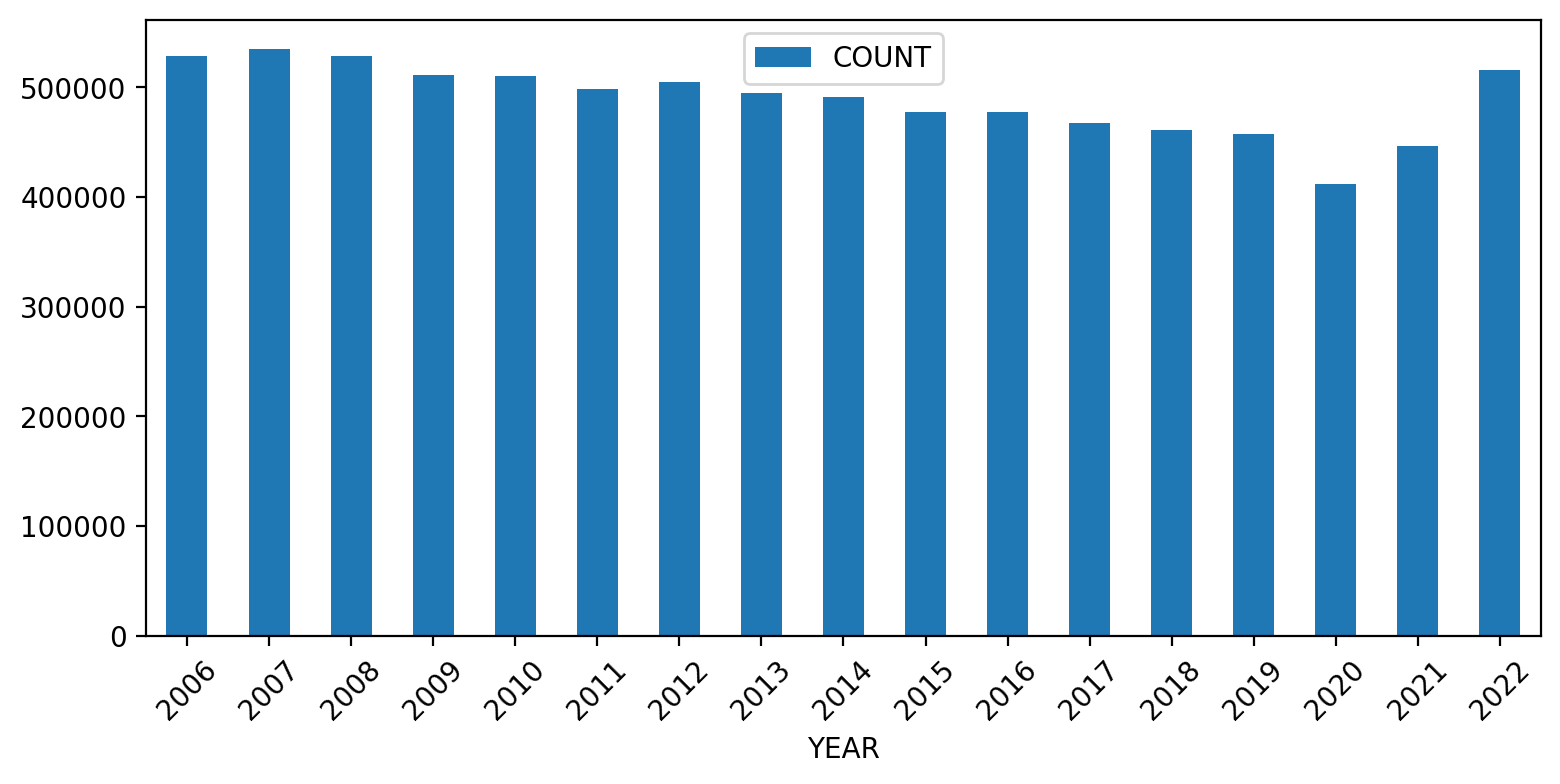

In [ ]:
# Create a plot that shows the total number of all reported crimes per year.
date_df.plot(
  kind='bar',
  x = 'YEAR',
  rot = 45,
  figsize=(9,4),
)

In [ ]:
# Question 2b: Create a plot that shows the total number of all reported crimes per month (ie Jan-2006, Feb-2006, ... Jan-2007, Feb-2007, Dec-2022).
sql = '''

  SELECT DATE_FORMAT(CMPLNT_FR, '%b-%Y') AS DATE, COUNT(*) AS COUNT
  FROM nypd
  WHERE YEAR(CMPLNT_FR) BETWEEN 2006 AND 2022
  GROUP BY DATE
  ORDER BY DATE;
'''

with engine.connect() as connection:
	date_df = pd.read_sql(text(sql), con=connection)

date_df

DATE  COUNT
0    Apr-2006  42181
1    Apr-2007  42279
2    Apr-2008  43064
3    Apr-2009  41367
4    Apr-2010  42924
..        ...    ...
199  Sep-2018  39013
200  Sep-2019  40275
201  Sep-2020  36028
202  Sep-2021  39966
203  Sep-2022  44407

[204 rows x 2 columns]

<Axes: xlabel='DATE'>

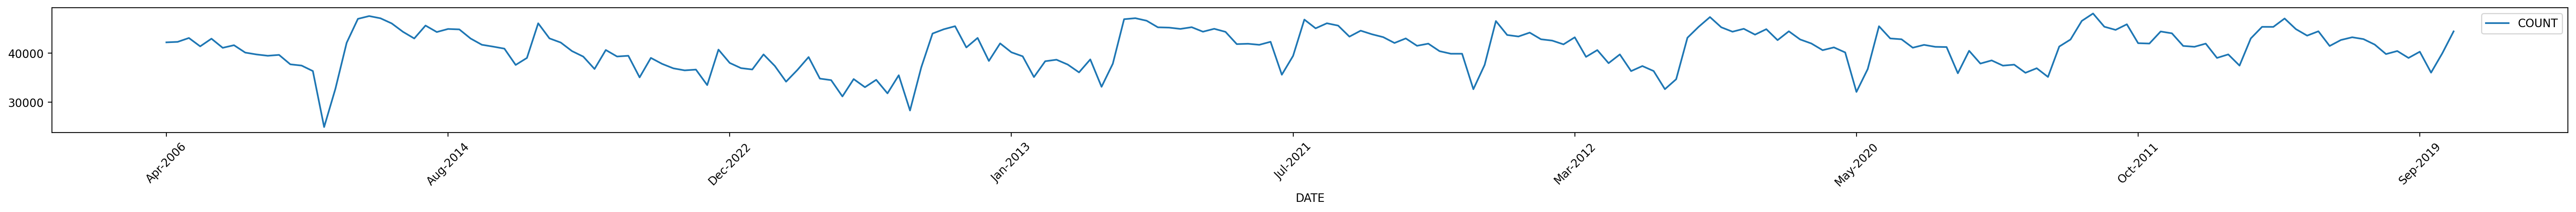

In [ ]:
date_df.plot(
  kind='line',
  x = 'DATE',
  rot = 45,
  figsize=(40,2),
)

## Question 3: Analysis of the "Big-7" felonies

The NYPD calls the following types of felonies as the "big-7" crimes, as they tend to affect most the quality of life:

* GRAND LARCENY
* ROBBERY
* FELONY ASSAULT
* BURGLARY
* GRAND LARCENY OF MOTOR VEHICLE
* RAPE
* MURDER & NON-NEGL. MANSLAUGHTER


Focus on the big-7 felonies. Report the number of these crimes over time, from 2006 till 2022, **broken down by type of felony**. Focus on reporting the **total** number of crimes per category, on a **per month** basis (Jan-06, Feb-06, ... Dec-22). Generate the associated plot with the number of big-7 felonies over time. You will probably want to make the y-axis logarithmic as the different felonies have different orders of magnitude.

**Hint 1**: The type of felony is included in the `OFNS_DESC` column of the `offense_codes` table and the key for the offense is the `KY_CD` attribute in the main table. You can use the `IN` command in SQL to limit your results to these offenses, or use an `OR` clause. Alternatively, you can use the [`.isin()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html) command in Pandas.

**Hint 2**: If you would like to move the legend outside the plot, you can use the following command: `df.plot(...).legend(bbox_to_anchor=(1, 0.75))`. The two values for the parameter `bbox_to_anchor` describe the x/y location of the legend, compared to the plot. Experiment with different values to understand the effect.


In [ ]:
sql = '''
SELECT DATE_FORMAT(nypd.CMPLNT_FR, '%b-%Y') AS DATE, nypd.KY_CD, offense_codes.OFNS_DESC, COUNT(*) AS COUNT
FROM nypd
INNER JOIN offense_codes
ON nypd.KY_CD = offense_codes.KY_CD
WHERE nypd.KY_CD IN ('103', '105', '106', '107', '109', '110', '101') AND YEAR(CMPLNT_FR) BETWEEN 2006 AND 2022
GROUP BY DATE, nypd.KY_CD, offense_codes.OFNS_DESC
ORDER BY DATE;
'''

with engine.connect() as connection:
	df = pd.read_sql(text(sql), con=connection)

df

DATE  KY_CD                        OFNS_DESC  COUNT
0     Apr-2006    101  MURDER & NON-NEGL. MANSLAUGHTER     40
1     Apr-2006    103   HOMICIDE-NEGLIGENT,UNCLASSIFIE      2
2     Apr-2006    105                          ROBBERY   1593
3     Apr-2006    106                   FELONY ASSAULT   1355
4     Apr-2006    107                         BURGLARY   1672
...        ...    ...                              ...    ...
1325  Sep-2022    105                          ROBBERY   1511
1326  Sep-2022    106                   FELONY ASSAULT   2200
1327  Sep-2022    107                         BURGLARY   1436
1328  Sep-2022    109                    GRAND LARCENY   4424
1329  Sep-2022    110   GRAND LARCENY OF MOTOR VEHICLE   1213

[1330 rows x 4 columns]

<Axes: xlabel='DATE'>

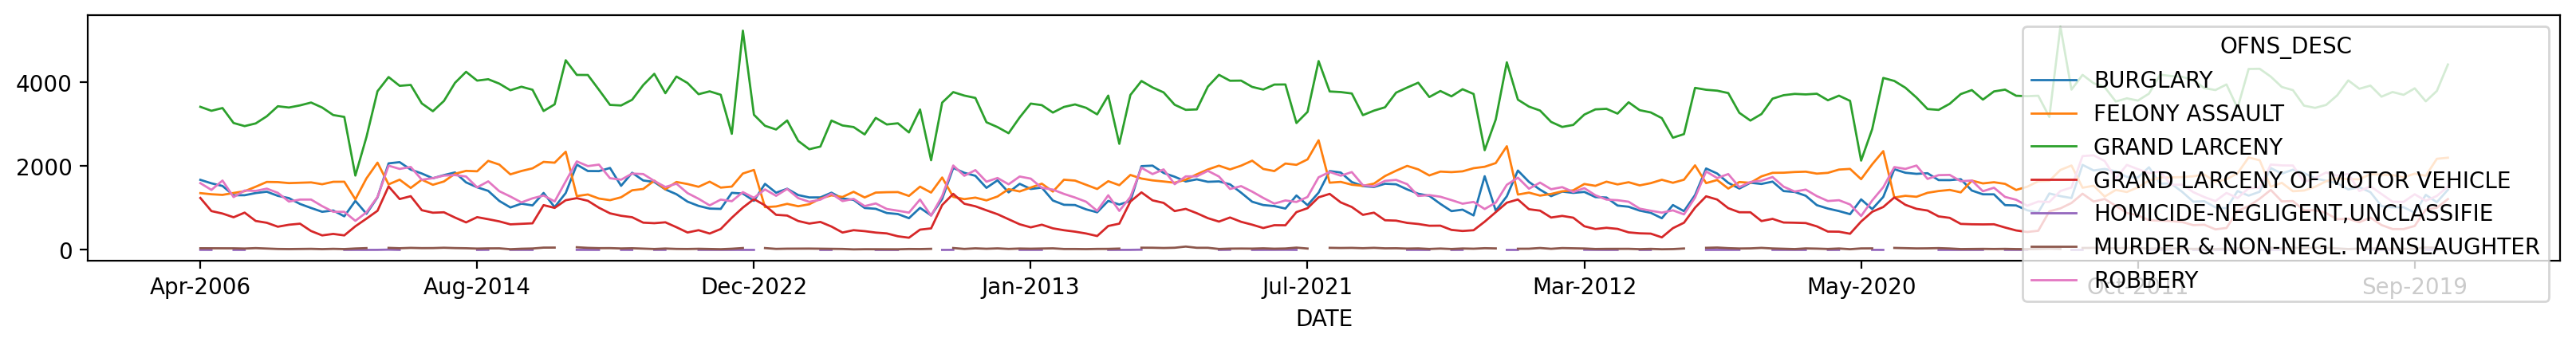

In [ ]:
(
  pd.pivot_table(
      data=df,  #
      index = "DATE",
      columns="OFNS_DESC",
      values="COUNT",

  )
  .plot(figsize=(20,2), linewidth = 1)
)


## Question 4: Analyze the Big-7 felonies based on hour of the day.

You are now asked to break down the different big-7 felonies by hour of day. We only want to calculate statistics based on the time of the day (i.e., 24 data points per crime). You do *not* need to generate the time series from 2006 to 2022 with hourly granularity.

* **Question 4a**: Show the number of big-7 felonies, broken down by hour of day. (e.g., _8375 reported robberies at 5am_). Generate a plot with the results.

* **Question 4b**: Show the number of big-7 felonies, broken down by hour of day. To allow for easier comparison among felonies, **normalize** the data by dividing by the total incidents for each type of felony.  (e.g., _2.8% of the reported robberies happen at 5am_). Generate a bar plot with the results.


**Hint 1**: You can use the commands `HOUR()`  in SQL, to extract the hour.

**Hint 2**: When creating plots, you may prefer to put the plot for each columns of the dataframe in a separate plot. The option `subplots=True` for the `df.plot()` command provides that capability. (See [the related documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html#subplots).) If you use the `subplots=True`, you can also use the `layout=(num_rows, num_columns)` option to specify the number of rows (`num_rows`) and the number of columns (`num_columns`) to use for the grid arrangement.


In [ ]:
sql = '''
SELECT HOUR(CMPLNT_FR) AS HourOfDay, nypd.KY_CD, offense_codes.OFNS_DESC, COUNT(*) AS COUNT
FROM nypd
INNER JOIN offense_codes
ON nypd.KY_CD = offense_codes.KY_CD
WHERE nypd.KY_CD IN ('103', '105', '106', '107', '109', '110', '101') AND YEAR(CMPLNT_FR) BETWEEN 2006 AND 2022
GROUP BY HourOfDay, nypd.KY_CD, offense_codes.OFNS_DESC
ORDER BY HourOfDay;
'''

with engine.connect() as connection:
	df = pd.read_sql(text(sql), con=connection)

df

HourOfDay  KY_CD                        OFNS_DESC  COUNT
0            0    101  MURDER & NON-NEGL. MANSLAUGHTER    429
1            0    103   HOMICIDE-NEGLIGENT,UNCLASSIFIE      7
2            0    105                          ROBBERY  15095
3            0    106                   FELONY ASSAULT  18453
4            0    107                         BURGLARY   9583
..         ...    ...                              ...    ...
163         23    105                          ROBBERY  16575
164         23    106                   FELONY ASSAULT  19098
165         23    107                         BURGLARY  10196
166         23    109                    GRAND LARCENY  23082
167         23    110   GRAND LARCENY OF MOTOR VEHICLE  11160

[168 rows x 4 columns]

<Axes: xlabel='HourOfDay'>

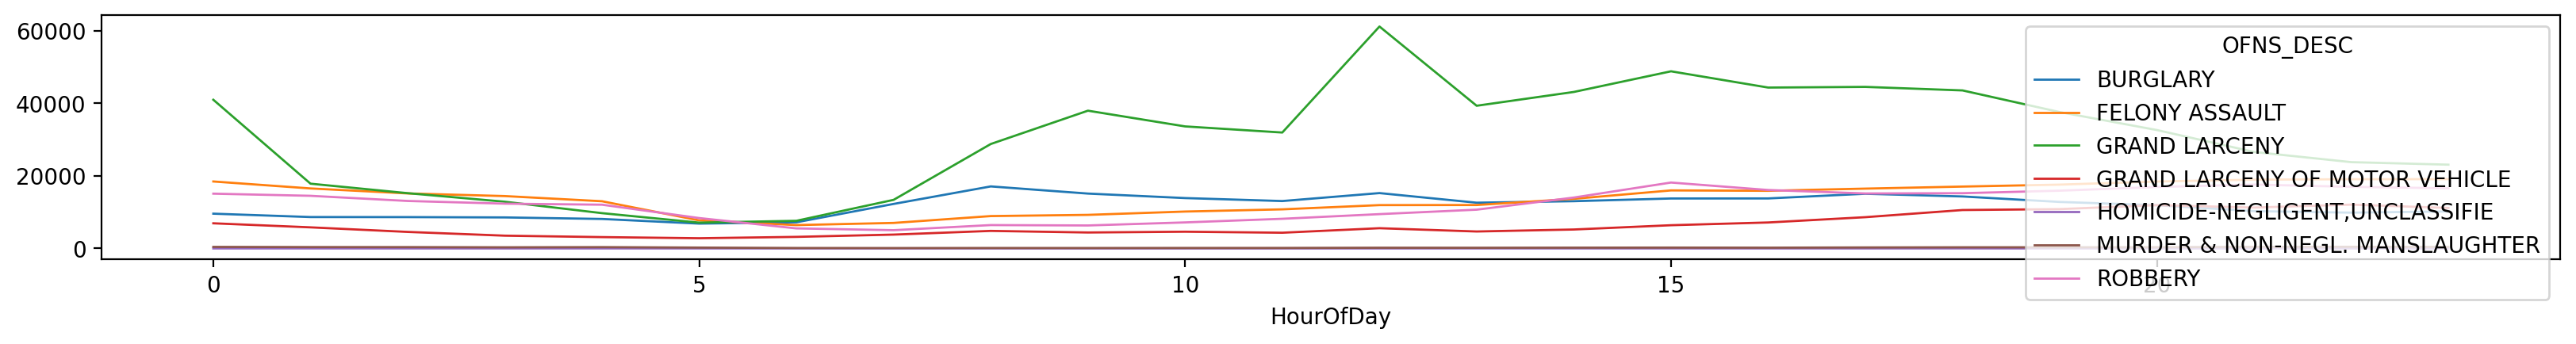

In [ ]:
# Question 4a: Show the number of big-7 felonies, broken down by hour of day.
 # (e.g., 8375 reported robberies at 5am). Generate a plot with the results.

(
  pd.pivot_table(
      data=df,  #
      index = "HourOfDay",
      columns="OFNS_DESC",
      values="COUNT",
      # aggfunc="sum"

  )
  .plot(figsize=(20,2), linewidth = 1)
)

Text(0.5, 1.0, 'Normalized Count of Big-7 Felonies by Hour of Day')

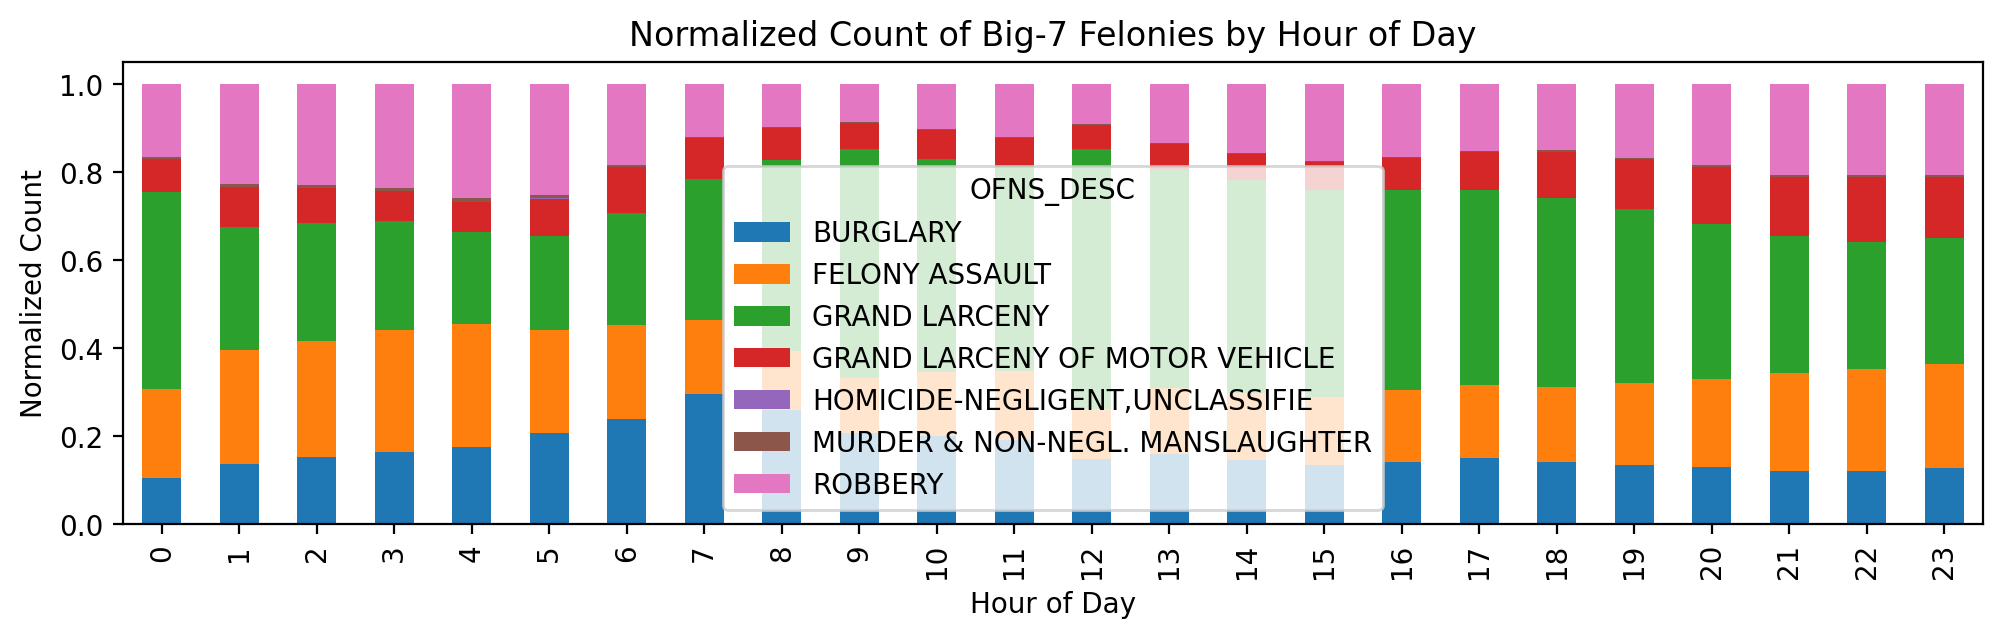

In [ ]:
# Question 4b: Show the number of big-7 felonies, broken down by hour of day.
# To allow for easier comparison among felonies, normalize the data by dividing
# by the total incidents for each type of felony. (e.g., 2.8% of the reported
# robberies happen at 5am). Generate a bar plot with the results.

# (
#   pd.pivot_table(
#       data=df,  #
#       index = "HourOfDay",
#       columns="OFNS_DESC",
#       values="COUNT",
#       # aggfunc="sum"

#   )
#   .plot(figsize=(20,2), linewidth = 1)
# )

#YOUR CODE HERE

# Pivot the data to create a pivot table
pivot_table = pd.pivot_table(df, index="HourOfDay", columns="OFNS_DESC", values="COUNT", aggfunc="sum")

# Normalize the data by dividing by the total incidents for each type of felony
normalized_data = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Generate a bar plot with the normalized data
ax = normalized_data.plot(kind="bar", stacked=True, figsize=(12, 3))

# Set labels and title
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Normalized Count")
ax.set_title("Normalized Count of Big-7 Felonies by Hour of Day")

# Show the plot



## Question 5: Spatial Analysis

You are asked to analyze the spatial density for the following types of felonies:

* GRAND LARCENY
* ROBBERY
* FELONY ASSAULT
* BURGLARY
* GRAND LARCENY OF MOTOR VEHICLE

Use the `Latitude` and `Longitude` variables from the dataset to identify the location of each crime. (FYI, for victim privacy, the reported rapes and murders do not have geocoding variables associated with them.) **Limit your analysis to  dates in 2022 and to crimes where  `Latitude` and `Longitude` are not NULL .**

**Hint 1**: Remember that if you do a 2d density estimation, you can speed up the computation by taking just a sample of the data that you analyze using the `dataframe.sample()` command.

**Hint 2**: If you could like to plot a map of NYC under your density plot, you can use the shapefile of NYC neighborhoods from NYC Open Data. See the code below.

**Hint 3**: You will need to generate 5 different heatmaps, one for each of the five types of felonies listed above.

In [1]:
# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
!curl 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' -o nyc-neighborhoods.geojson

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0^C


<Axes: >

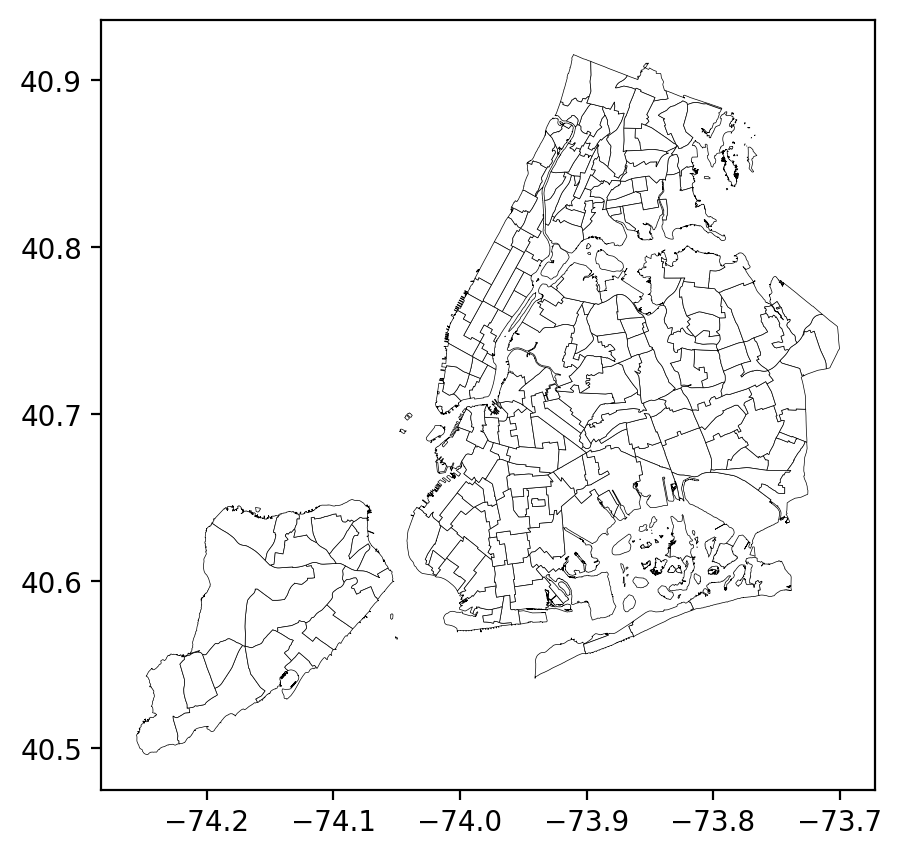

In [ ]:
# Load the shapefile
df_nyc = gpd.GeoDataFrame.from_file('nyc-neighborhoods.geojson')

# Create a plot
df_nyc.plot(linewidth=0.25, color='White', edgecolor='Black', figsize=(5, 5))

In [ ]:
#GRAND LARCENY DF
sql = '''
SELECT LATITUDE, LONGITUDE
FROM nypd

WHERE nypd.KY_CD = '109' AND YEAR(CMPLNT_FR) = 2022;
'''

with engine.connect() as connection:
	grand_larceny_df = pd.read_sql(text(sql), con=connection)

grand_larceny_df

LATITUDE  LONGITUDE
0      40.741631 -73.995583
1      40.808266 -73.926445
2      40.741043 -74.007729
3      40.760002 -73.914299
4      40.579037 -73.961044
...          ...        ...
48258  40.710251 -73.963509
48259  40.682362 -73.826080
48260  40.762264 -73.958565
48261  40.848667 -73.937370
48262  40.683292 -73.974854

[48263 rows x 2 columns]

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

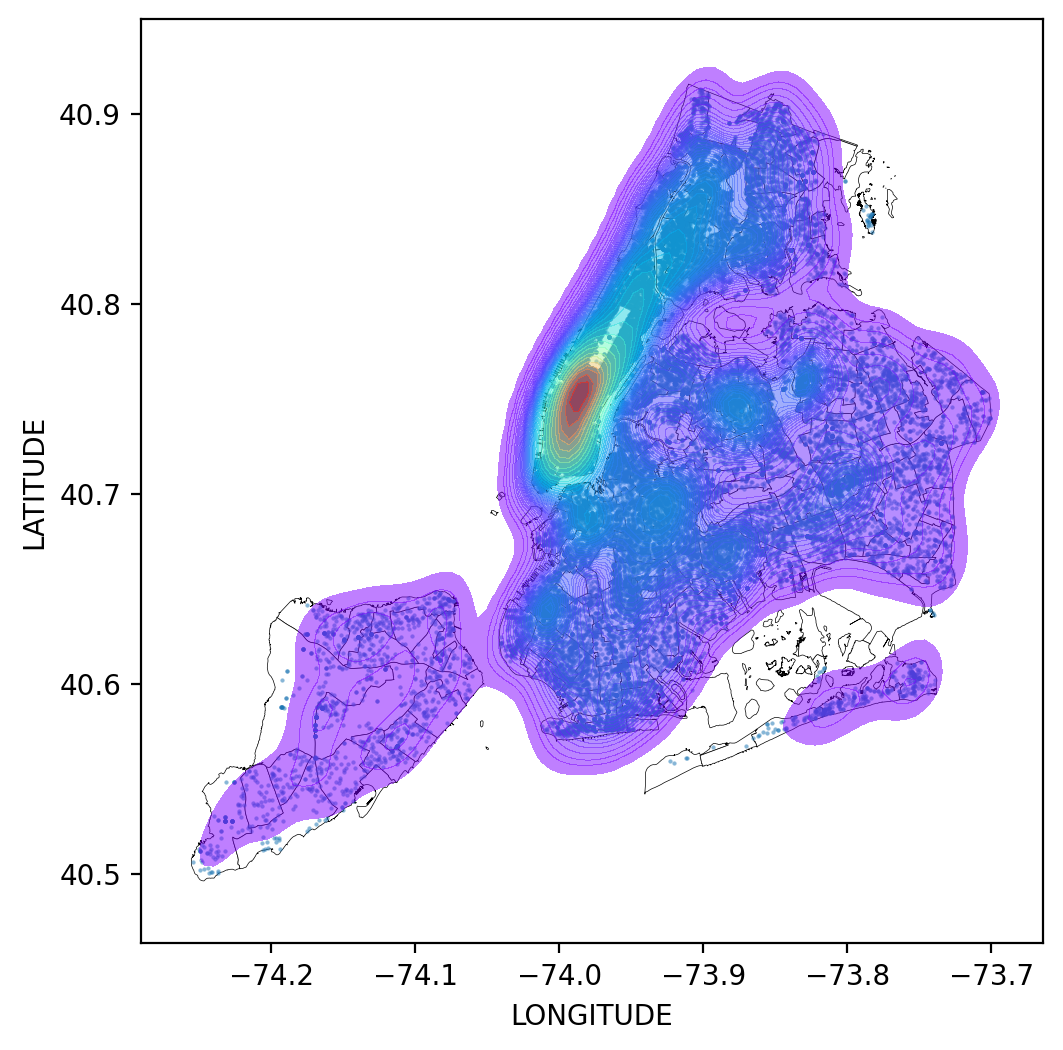

In [ ]:
#GRAND LARCENY PLOT
base = df_nyc.plot(linewidth=0.25, color='White', edgecolor='Black', figsize=(5, 5))

scatter = grand_larceny_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 0.3, # keep the size of each dot small
    figsize = (6,6), # resise the figure
    alpha = 0.5, # make dots transparent
    ax = base
)

sns.kdeplot(
    data=grand_larceny_df,
    x='LONGITUDE',
    y='LATITUDE',
    gridsize=100,  # controls the resolution
    cmap='rainbow',  # color scheme
    fill= True, # whether to have a density plot (True), or just the contours (False)
    alpha=0.5,
    thresh=0.01, # stop putting color in areas with density below 0.01
    n_levels=50,  # How many contours/levels to have
    # height = 10, # figure height
    ax = scatter
)

In [ ]:
#ROBBERY DF
sql = '''
SELECT LATITUDE, LONGITUDE
FROM nypd

WHERE nypd.KY_CD = '105' AND YEAR(CMPLNT_FR) = 2022;
'''

with engine.connect() as connection:
	robbery_df = pd.read_sql(text(sql), con=connection)

robbery_df

LATITUDE  LONGITUDE
0      40.760525 -73.979973
1      40.725620 -73.762527
2      40.767178 -73.963806
3      40.828308 -73.913422
4      40.844158 -73.900604
...          ...        ...
17208  40.652458 -73.936279
17209  40.688873 -73.871399
17210  40.833382 -73.910042
17211  40.805737 -73.940643
17212  40.751293 -73.934288

[17213 rows x 2 columns]

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

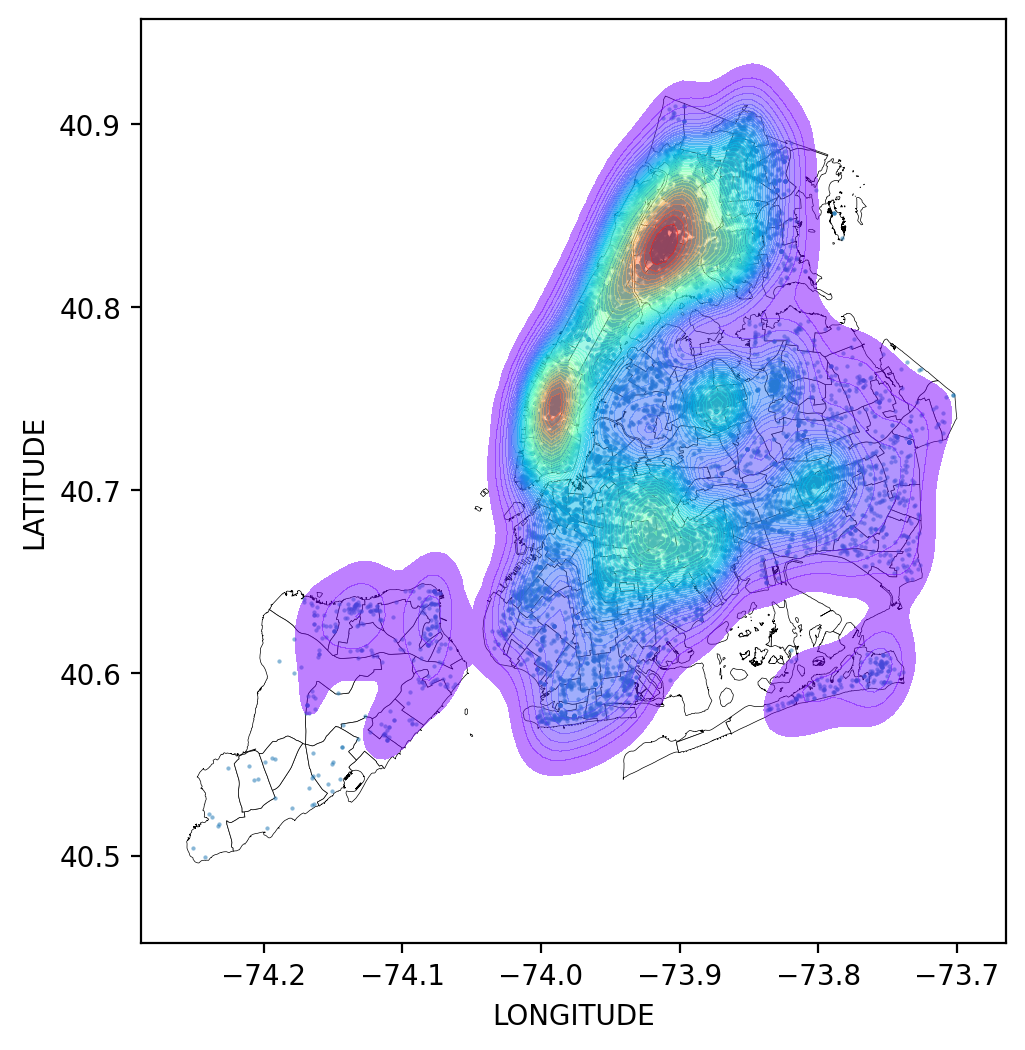

In [ ]:
#ROBERY PLOT
base = df_nyc.plot(linewidth=0.25, color='White', edgecolor='Black', figsize=(5, 5))

scatter = robbery_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 0.3, # keep the size of each dot small
    figsize = (6,6), # resise the figure
    alpha = 0.5, # make dots transparent
    ax = base
)

sns.kdeplot(
    data=robbery_df,
    x='LONGITUDE',
    y='LATITUDE',
    gridsize=100,  # controls the resolution
    cmap='rainbow',  # color scheme
    fill= True, # whether to have a density plot (True), or just the contours (False)
    alpha=0.5,
    thresh=0.01, # stop putting color in areas with density below 0.01
    n_levels=50,  # How many contours/levels to have
    # height = 10, # figure height
    ax = scatter
)

In [ ]:
#FELONY ASSAULT DF
sql = '''
SELECT LATITUDE, LONGITUDE
FROM nypd

WHERE nypd.KY_CD = '106' AND YEAR(CMPLNT_FR) = 2022;
'''

with engine.connect() as connection:
	felony_df = pd.read_sql(text(sql), con=connection)

felony_df

LATITUDE  LONGITUDE
0      40.749405 -73.991783
1      40.697994 -73.797859
2      40.701313 -73.981796
3      40.701790 -73.808403
4      40.744446 -73.773697
...          ...        ...
25661  40.827690 -73.876099
25662  40.678860 -73.765930
25663  40.664047 -73.934349
25664  40.678207 -73.974503
25665  40.766911 -73.936363

[25666 rows x 2 columns]

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

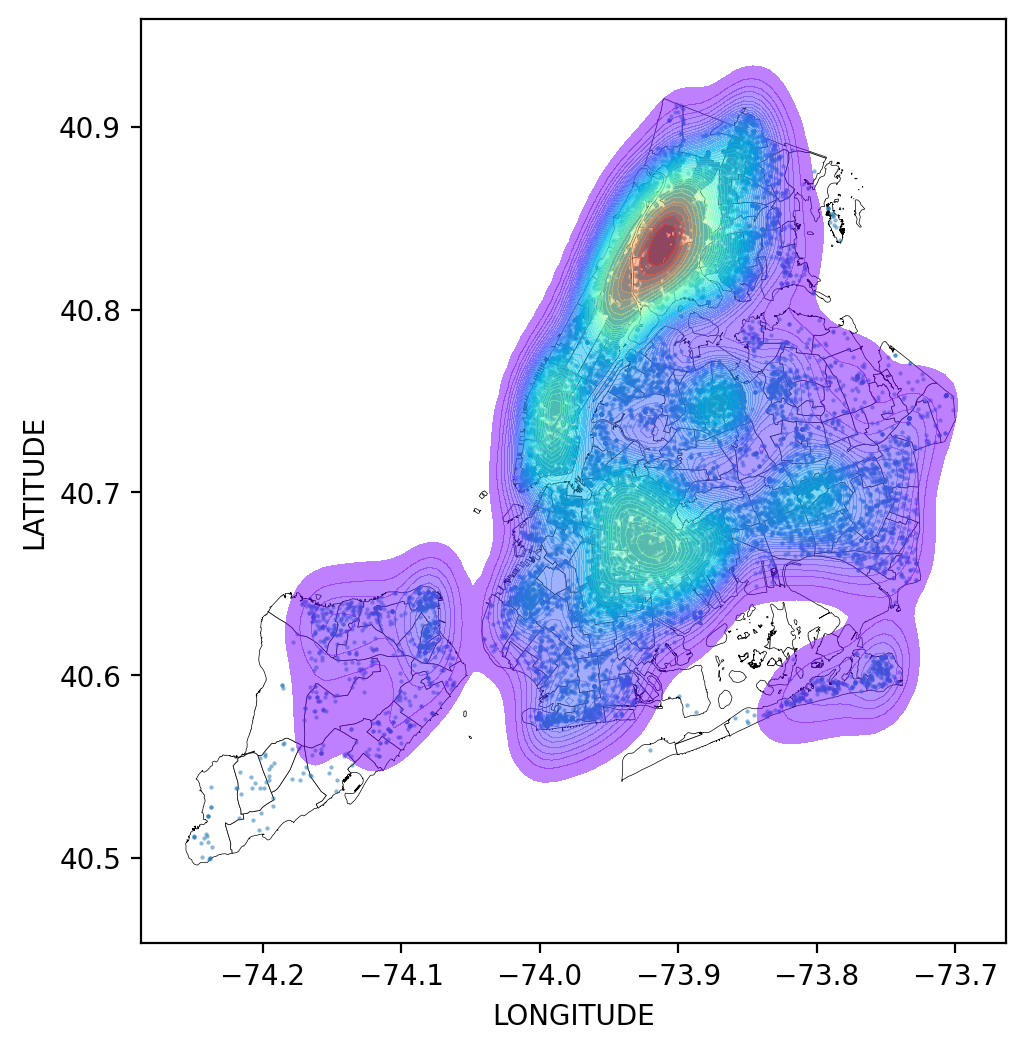

In [ ]:
#FELONY ASSAULT PLOT
base = df_nyc.plot(linewidth=0.25, color='White', edgecolor='Black', figsize=(5, 5))

scatter = felony_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 0.3, # keep the size of each dot small
    figsize = (6,6), # resise the figure
    alpha = 0.5, # make dots transparent
    ax = base
)

sns.kdeplot(
    data=felony_df,
    x='LONGITUDE',
    y='LATITUDE',
    gridsize=100,  # controls the resolution
    cmap='rainbow',  # color scheme
    fill= True, # whether to have a density plot (True), or just the contours (False)
    alpha=0.5,
    thresh=0.01, # stop putting color in areas with density below 0.01
    n_levels=50,  # How many contours/levels to have
    # height = 10, # figure height
    ax = scatter
)

In [ ]:
#BURGLARY DF
sql = '''
SELECT LATITUDE, LONGITUDE
FROM nypd

WHERE nypd.KY_CD = '107' AND YEAR(CMPLNT_FR) = 2022;
'''

with engine.connect() as connection:
	burglary_df = pd.read_sql(text(sql), con=connection)

burglary_df

LATITUDE  LONGITUDE
0      40.862785 -73.901688
1      40.792641 -73.951263
2      40.736485 -74.006226
3      40.725197 -73.999725
4      40.738136 -74.004883
...          ...        ...
15446  40.815208 -73.931221
15447  40.694256 -73.932808
15448  40.796131 -73.820465
15449  40.631950 -73.977394
15450  40.746784 -73.919868

[15451 rows x 2 columns]

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

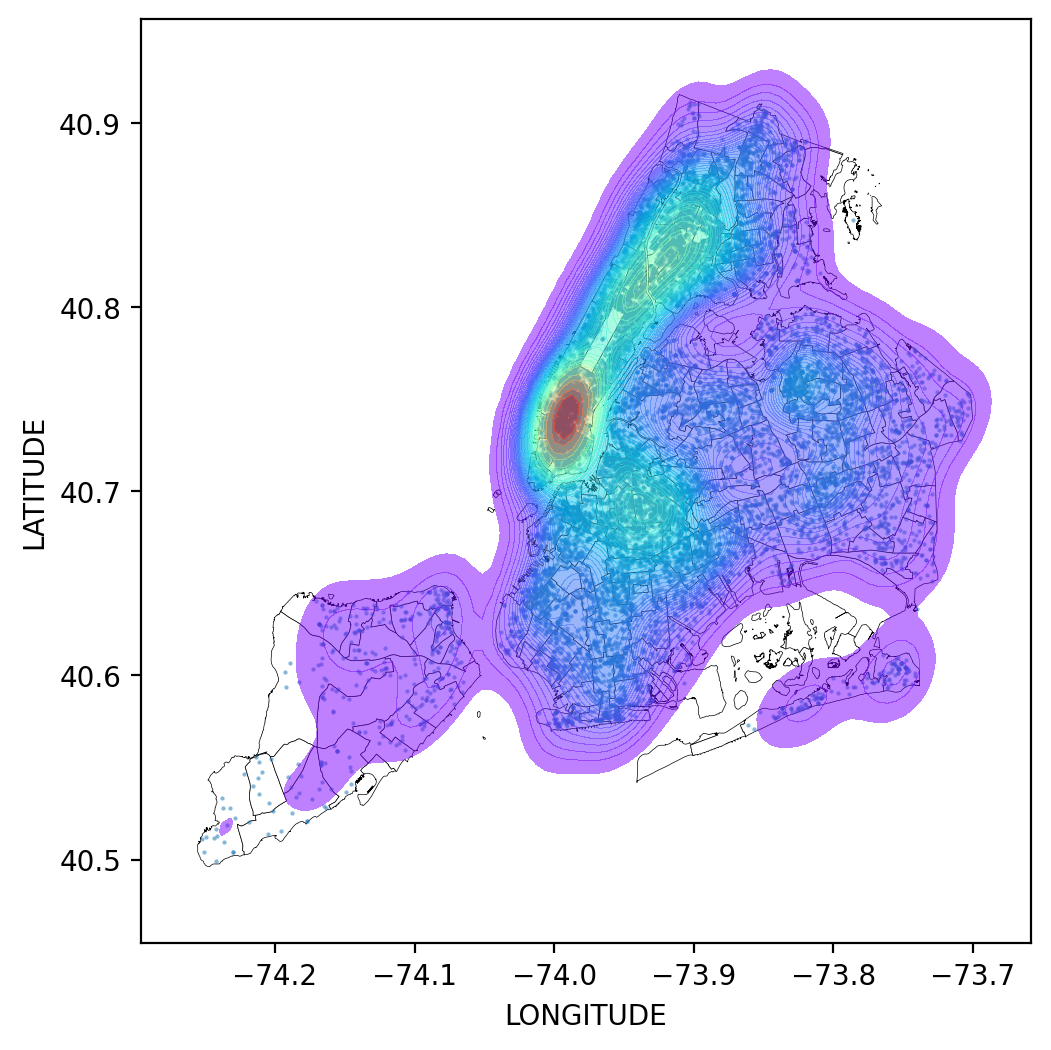

In [ ]:
#BURGLARY PLOT
base = df_nyc.plot(linewidth=0.25, color='White', edgecolor='Black', figsize=(5, 5))

scatter = burglary_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 0.3, # keep the size of each dot small
    figsize = (6,6), # resise the figure
    alpha = 0.5, # make dots transparent
    ax = base
)

sns.kdeplot(
    data=burglary_df,
    x='LONGITUDE',
    y='LATITUDE',
    gridsize=100,  # controls the resolution
    cmap='rainbow',  # color scheme
    fill= True, # whether to have a density plot (True), or just the contours (False)
    alpha=0.5,
    thresh=0.01, # stop putting color in areas with density below 0.01
    n_levels=50,  # How many contours/levels to have
    # height = 10, # figure height
    ax = scatter
)

In [ ]:
#FELONY OF MV DF
sql = '''
SELECT LATITUDE, LONGITUDE
FROM nypd

WHERE nypd.KY_CD = '110' AND YEAR(CMPLNT_FR) = 2022;
'''

with engine.connect() as connection:
	grand_larceny_mv_df = pd.read_sql(text(sql), con=connection)

grand_larceny_mv_df

LATITUDE  LONGITUDE
0      40.822296 -73.850372
1      40.823193 -73.855309
2      40.650921 -73.930290
3      40.633118 -73.888931
4      40.700260 -73.808670
...          ...        ...
13522  40.833782 -73.851532
13523  40.836205 -73.853706
13524  40.653233 -73.952744
13525  40.827721 -73.887970
13526  40.888554 -73.841057

[13527 rows x 2 columns]

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

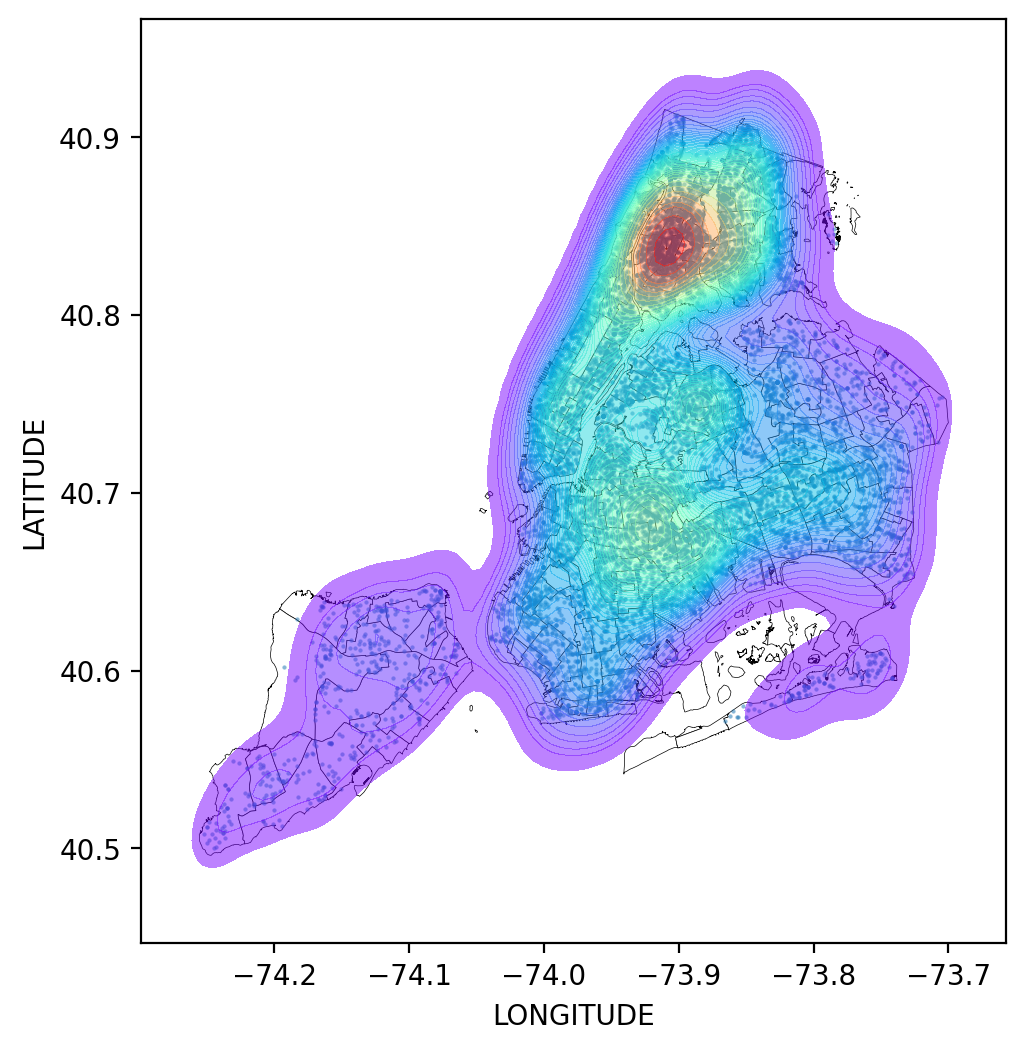

In [ ]:
#FELONY OF MV PLOT
base = df_nyc.plot(linewidth=0.25, color='White', edgecolor='Black', figsize=(5, 5))

scatter = grand_larceny_mv_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 0.3, # keep the size of each dot small
    figsize = (6,6), # resise the figure
    alpha = 0.5, # make dots transparent
    ax = base
)

sns.kdeplot(
    data=grand_larceny_mv_df,
    x='LONGITUDE',
    y='LATITUDE',
    gridsize=100,  # controls the resolution
    cmap='rainbow',  # color scheme
    fill= True, # whether to have a density plot (True), or just the contours (False)
    alpha=0.5,
    thresh=0.01, # stop putting color in areas with density below 0.01
    n_levels=50,  # How many contours/levels to have
    # height = 10, # figure height
    ax = scatter
)